In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("feyzazkefe/trashnet")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'trashnet' dataset.
Path to dataset files: /kaggle/input/trashnet


In [2]:
import os
data_path = '/kaggle/input/trashnet'
print(os.listdir(data_path))

['dataset-resized']


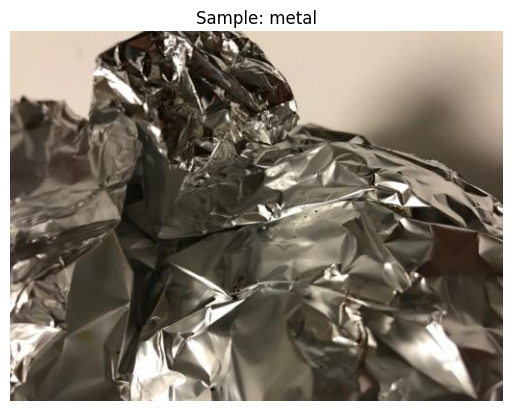

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

# Change to your actual dataset path
data_path = '/kaggle/input/trashnet/dataset-resized'
class_name = os.listdir(data_path)[0]  # e.g., 'metal'
class_path = os.path.join(data_path, class_name)
sample_image = os.listdir(class_path)[2]  # second image in 'cardboard'
img_path = os.path.join(class_path, sample_image)

img = Image.open(img_path)
plt.imshow(img)
plt.title(f'Sample: {class_name}')
plt.axis('off')
plt.show()


In [4]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
#augmentation

data_dir = '/kaggle/input/trashnet/dataset-resized'

train_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

val_test_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])



In [8]:
!pip install ultralytics


In [10]:
from ultralytics import YOLO
import shutil
##shutil.copytree('/kaggle/input/trashnet/dataset-resized', '/content/dataset-resized')

# Define folders
data_dir = '/content/dataset-resized'

# Start training
model = YOLO('yolov8n-cls.pt')

# Use the manually split datasets
model.train(data=data_dir, epochs=10, imgsz=128, batch=32)

Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset-resized, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=128, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train6, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e61e41731a0>
curves: []
curves_results: []
fitness: 0.9448818862438202
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.8897637724876404, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9448818862438202}
save_dir: PosixPath('/content/runs/classify/train6')
speed: {'preprocess': 0.10246836023684158, 'inference': 0.3782606909445478, 'loss': 0.00024340944918098043, 'postprocess': 0.0002560728344679939}
task: 'classify'
top1: 0.8897637724876404
top5: 1.0

In [11]:
results = model.val()


Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,442,566 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=train' not found at /content/dataset-resized/train
Found 2527 images in subdirectories. Attempting to split...
Splitting /content/dataset-resized (6 classes, 2527 images) into 80% train, 20% val...
Split complete in /content/dataset-resized_split ✅
train: /content/dataset-resized_split/train... found 2505 images in 6 classes ✅ 
val: /content/dataset-resized_split/val... found 1242 images in 6 classes ✅ 
test: None...
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 814.5±179.2 MB/s, size: 19.0 KB)
val: Scanning /content/dataset-resized_split/val... 1242 images, 0 corrupt: 100% ━━━━━━━━━━━━ 1242/1242 5.7Kit/s 0.2s
val: New cache created: /content/dataset-resized_split/val.cache
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 39/39 11.0it/s 3.5s
                   all       0.95 

In [12]:
# Predict on a single image
model.predict(img_path)


image 1/1 /kaggle/input/trashnet/dataset-resized/metal/metal374.jpg: 128x128 metal 1.00, trash 0.00, plastic 0.00, paper 0.00, glass 0.00, 2.9ms
Speed: 3.3ms preprocess, 2.9ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 masks: None
 names: {0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}
 obb: None
 orig_img: array([[[195, 215, 233],
         [195, 215, 233],
         [195, 215, 233],
         ...,
         [189, 208, 229],
         [189, 208, 229],
         [189, 208, 229]],
 
        [[195, 215, 233],
         [195, 215, 233],
         [195, 215, 233],
         ...,
         [189, 208, 229],
         [189, 208, 229],
         [189, 208, 229]],
 
        [[195, 215, 233],
         [195, 215, 233],
         [195, 215, 233],
         ...,
         [189, 208, 229],
         [189, 208, 229],
         [189, 208, 229]],
 
        ...,
 
        [[ 51,  63,  73],
         [ 52,  64,  74],
         [ 55,  67,  77],
         ...,
         [ 42,  50,  57],
         [ 38,  46,  53],
         [ 40,  48,  55]],
 
        [[ 54,  66,  76],
         [ 57,  69,  79],
         [ 59,  71,  81],
  

In [13]:
model.export(format='onnx')

Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from '/content/runs/classify/train6/weights/best.pt' with input shape (1, 3, 128, 128) BCHW and output shape(s) (1, 6) (2.8 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim>=0.1.67', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 9.0s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.19.1rc1 opset 22...
ONNX: slimming with onnxslim 0.1.70...
ONNX: export success ✅ 9.6s, saved as '/content/runs/classify/train6/weights/best.onnx' (5.5 MB)

Export complete (9.8s)
Results saved to /content/runs/classify/train6/weights
Predict:         yolo predict task=classify model=/content/runs/classify/train6/weights/best.onnx

'/content/runs/classify/train6/weights/best.onnx'

In [15]:
import csv
import glob

image_paths = glob.glob('/content/dataset-resized/*/*.jpg')
output_csv = 'conveyor_results.csv'

with open(output_csv, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Image', 'Predicted Class', 'Confidence'])

    for img_path in image_paths:
        results = model.predict(img_path)
        # Get best class and confidence
        probs = results[0].probs.data
        class_idx = probs.argmax().item()
        conf = probs[class_idx].item()
        class_name = results[0].names[class_idx]
        writer.writerow([img_path, class_name, conf])
        print(f'{img_path}: {class_name} ({conf:.2f})')


Streaming output truncated to the last 5000 lines.

image 1/1 /content/dataset-resized/metal/metal63.jpg: 128x128 metal 0.92, paper 0.06, trash 0.02, cardboard 0.00, glass 0.00, 4.3ms
Speed: 3.2ms preprocess, 4.3ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)
/content/dataset-resized/metal/metal63.jpg: metal (0.92)

image 1/1 /content/dataset-resized/metal/metal384.jpg: 128x128 metal 0.87, glass 0.12, trash 0.00, cardboard 0.00, plastic 0.00, 3.7ms
Speed: 3.1ms preprocess, 3.7ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)
/content/dataset-resized/metal/metal384.jpg: metal (0.87)

image 1/1 /content/dataset-resized/metal/metal143.jpg: 128x128 metal 0.99, glass 0.01, cardboard 0.00, paper 0.00, trash 0.00, 3.7ms
Speed: 3.3ms preprocess, 3.7ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)
/content/dataset-resized/metal/metal143.jpg: metal (0.99)

image 1/1 /content/dataset-resized/metal/metal276.jpg: 128x128 metal 0.99, glass 0.0

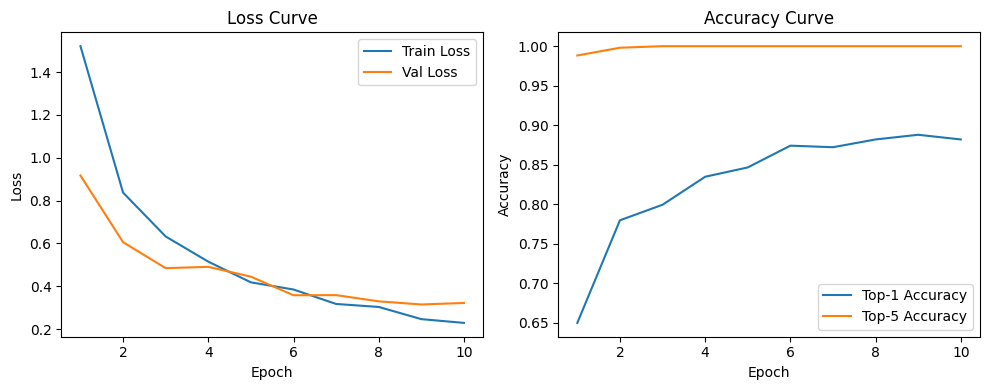

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Path to the directory where YOLO saved the training results
results_dir = '/content/runs/classify/train6' # Update this if your run name is different

# Path to the results.csv file generated by YOLO
csv_path = os.path.join(results_dir, 'results.csv')

# Check if the results.csv file exists
if not os.path.exists(csv_path):
    print(f"Error: results.csv not found at {csv_path}")
else:
    df_results = pd.read_csv(csv_path)

    plt.figure(figsize=(10, 4))

    # Loss curves
    plt.subplot(1, 2, 1)
    plt.plot(df_results['epoch'], df_results['train/loss'], label='Train Loss')
    plt.plot(df_results['epoch'], df_results['val/loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    plt.legend()

    # Accuracy curves
    plt.subplot(1, 2, 2)
    plt.plot(df_results['epoch'], df_results['metrics/accuracy_top1'], label='Top-1 Accuracy')
    plt.plot(df_results['epoch'], df_results['metrics/accuracy_top5'], label='Top-5 Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curve')
    plt.legend()

    plt.tight_layout()
    plt.show()